# Twitter US Airline Sentiment Analysis 

# Import Packages 

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inlines
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from PIL import Image

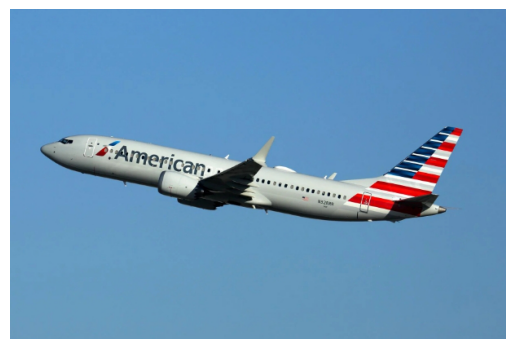

In [4]:
Image = Image.open(r"C:\Users\hiten\Downloads\US Airline.jpeg")
plt.imshow(Image)
plt.axis('off')
plt.show()

In [5]:
raw_data = pd.read_csv(r"C:\Users\hiten\Downloads\archive (2)\Tweets.csv")

In [6]:
raw_data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [7]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [8]:
print("The data has {} Rows and {} Columns".format(raw_data.shape[0],raw_data.shape[1]))

The data has 14640 Rows and 15 Columns


## Missing Values and Duplicate Values 

In [10]:
raw_data.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

### As we can see there are lots of missing values in dataset

In [12]:
raw_data.drop(['negativereason_confidence','airline_sentiment_gold','negativereason_gold','tweet_coord','tweet_location','user_timezone','tweet_id'],axis=1,inplace=True)
raw_data["negativereason"] = raw_data.negativereason.fillna("N/A")

In [13]:
raw_data.isnull().sum()

airline_sentiment               0
airline_sentiment_confidence    0
negativereason                  0
airline                         0
name                            0
retweet_count                   0
text                            0
tweet_created                   0
dtype: int64

##### I am removing columns with a high proportion of null values, except for the 'negativereason' column, as it could provide valuable insights for analysis. For this column, I am filling the missing values with 'N/A' (indicating "not available").

In [15]:
print(f"Duplicate Lines in Data set: {raw_data.duplicated().sum()}")

Duplicate Lines in Data set: 67


In [16]:
raw_data.drop_duplicates(inplace=True)
print(f"Duplicate Lines in Data set: {raw_data.duplicated().sum()}")

Duplicate Lines in Data set: 0


### we Remove the Duplicate Lines from Data Set

In [18]:
data = raw_data.copy()
data.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,airline,name,retweet_count,text,tweet_created
0,neutral,1.0000,N/A,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800
1,positive,0.3486,N/A,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800
2,neutral,0.6837,N/A,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800
3,negative,1.0000,Bad Flight,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800
4,negative,1.0000,Can't Tell,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800


In [19]:
text_data = pd.DataFrame(data.text)
text_data.head()

,text
0,@VirginAmerica What @dhepburn said.
1,@VirginAmerica plus you've added commercials t...
2,@VirginAmerica I didn't today... Must mean I n...
3,@VirginAmerica it's really aggressive to blast...
4,@VirginAmerica and it's a really big bad thing...


In [20]:
text_data.iloc[420,0]

'@VirginAmerica is helping me step up my @Tinder game! #TinderTips #tinderchamp http://t.co/jBmVVha63A'

# Text Data Cleaning and Pre-processing 

#### 1. Lower Case

In [23]:
text_data.text = text_data.text.str.lower()

In [24]:
text_data.iloc[420,0]

'@virginamerica is helping me step up my @tinder game! #tindertips #tinderchamp http://t.co/jbmvvha63a'

#### 2. Remove URL from Text 

In [26]:
text_data.text = text_data.replace(r'http\S+|www\S+','',regex=True)
text_data.iloc[420,0]

'@virginamerica is helping me step up my @tinder game! #tindertips #tinderchamp '

#### 3. Remove Punctuation from Text

In [28]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [29]:
def remove_pun(abc):
    x = "".join([c for c in abc if c not in string.punctuation])
    return x

In [30]:
text_data.iloc[420,0]

'@virginamerica is helping me step up my @tinder game! #tindertips #tinderchamp '

In [31]:
text_data.text = text_data.text.apply(lambda x: remove_pun(x))

In [32]:
text_data.iloc[420,0]

'virginamerica is helping me step up my tinder game tindertips tinderchamp '

#### 4. Remove Numbers from Text

In [34]:
text_data.iloc[42,0]

'virginamerica plz help me win my bid upgrade for my flight 227 laxgtsea  🍷👍💺✈️'

In [35]:
text_data.text = text_data.replace(r'\d+','',regex=True)
text_data.iloc[42,0]

'virginamerica plz help me win my bid upgrade for my flight  laxgtsea  🍷👍💺✈️'

#### 5. Remove Stop Words from Text

In [37]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
print("No of Stop Words :",len(stop))
stop

No of Stop Words : 179


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hiten\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [38]:
text_data.iloc[420,0]

'virginamerica is helping me step up my tinder game tindertips tinderchamp '

In [39]:
text_data.text = text_data.text.apply(lambda x: ' '.join([abc for abc in x.split() if abc not in (stop)]))
text_data.iloc[420,0]

'virginamerica helping step tinder game tindertips tinderchamp'

#### 6. Remove Common words from Text 

In [41]:
import re
nltk.download('words')
words = set(nltk.corpus.words.words())

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\hiten\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [42]:
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text =  re.sub('virginamerica|tinder|america', '', text)
    text =  re.sub('virgin','', text) 
    text =  re.sub(r"\b[a-zA-Z]\b", "", text) 
    text =  re.sub(r"\b[a-zA-Z][a-zA-Z]\b", "", text)  
    text =  " ".join(w 
                     for w in nltk.wordpunct_tokenize(text)  
                      if w.lower() in words)  
    return text

In [43]:
text_data.iloc[420,0]

'virginamerica helping step tinder game tindertips tinderchamp'

In [44]:
text_data = pd.DataFrame(text_data.text.apply(lambda x: clean_text_round2(x)))
text_data.iloc[420,0]

'helping step game champ'

#### 7. lemmatization 

In [46]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
word_tokenizer = nltk.tokenize.WhitespaceTokenizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hiten\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [47]:
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w,"v") 
            for w in word_tokenizer.tokenize(text)]

In [48]:
text_data.iloc[420,0]

'helping step game champ'

In [49]:
text_data.text = text_data.text.apply(lambda x:' '.join(lemmatize_text(x)))
text_data.iloc[420,0]

'help step game champ'

#### 8. Remove Emojies from text 

In [51]:
import re

def remove_emojis(text):
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002700-\U000027BF"  # other symbols
        u"\U000024C2-\U0001F251"  # enclosed characters
        "]+", flags=re.UNICODE
    )
    return emoji_pattern.sub(r'', text)

In [52]:
text_data.text = text_data.text.apply(lambda x: ''.join(remove_emojis(x)))
text_data.iloc[42,0]

'help win bid upgrade flight'

### Now, I want to know when the tweets were created. To do this, I have to extract features like year, month, day ... from the data

In [54]:
data['tweet_created'] = pd.to_datetime(data['tweet_created'], errors='coerce')

In [55]:
# Ensure 'tweet_created' is already in datetime without any re-parsing
data['tweet_created'] = data['tweet_created'].dt.tz_localize(None)

# Extract day of the week, month, and year
data['day_of_week'] = data['tweet_created'].dt.day_name()   # Day of the week
data['month'] = data['tweet_created'].dt.month_name()   # Abbreviated month
data['year'] = data['tweet_created'].dt.year                # Year as integer

# Display the first few rows
data.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,airline,name,retweet_count,text,tweet_created,day_of_week,month,year
0,neutral,1.0000,N/A,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52,Tuesday,February,2015
1,positive,0.3486,N/A,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59,Tuesday,February,2015
2,neutral,0.6837,N/A,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48,Tuesday,February,2015
3,negative,1.0000,Bad Flight,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36,Tuesday,February,2015
4,negative,1.0000,Can't Tell,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45,Tuesday,February,2015


In [56]:
data.month.unique(),data.year.unique()

(array(['February'], dtype=object), array([2015]))

### All the tweets in the table were written in February 2015.

In [58]:
data = data.drop('text',axis=1)

In [59]:
data.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,airline,name,retweet_count,tweet_created,day_of_week,month,year
0,neutral,1.0000,N/A,Virgin America,cairdin,0,2015-02-24 11:35:52,Tuesday,February,2015
1,positive,0.3486,N/A,Virgin America,jnardino,0,2015-02-24 11:15:59,Tuesday,February,2015
2,neutral,0.6837,N/A,Virgin America,yvonnalynn,0,2015-02-24 11:15:48,Tuesday,February,2015
3,negative,1.0000,Bad Flight,Virgin America,jnardino,0,2015-02-24 11:15:36,Tuesday,February,2015
4,negative,1.0000,Can't Tell,Virgin America,jnardino,0,2015-02-24 11:14:45,Tuesday,February,2015


In [60]:
data = pd.concat([data,text_data],axis=1)
data.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,airline,name,retweet_count,tweet_created,day_of_week,month,year,text
0,neutral,1.0000,N/A,Virgin America,cairdin,0,2015-02-24 11:35:52,Tuesday,February,2015,say
1,positive,0.3486,N/A,Virgin America,jnardino,0,2015-02-24 11:15:59,Tuesday,February,2015,plus youve add experience tacky
2,neutral,0.6837,N/A,Virgin America,yvonnalynn,0,2015-02-24 11:15:48,Tuesday,February,2015,didnt today must mean need take another trip
3,negative,1.0000,Bad Flight,Virgin America,jnardino,0,2015-02-24 11:15:36,Tuesday,February,2015,really aggressive blast obnoxious entertainmen...
4,negative,1.0000,Can't Tell,Virgin America,jnardino,0,2015-02-24 11:14:45,Tuesday,February,2015,really big bad thing


### we drop the text from old data and concat the preprocessing text to data for sentiment analysis.

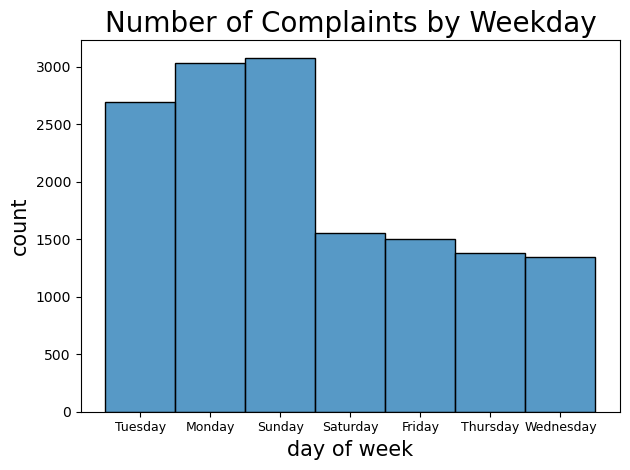

In [62]:
sns.histplot(data=data,x='day_of_week')
plt.title('Number of Complaints by Weekday',fontsize=20)
plt.xlabel("day of week",fontsize=15)
plt.xticks(fontsize=9)
plt.ylabel('count',fontsize=15)

plt.tight_layout() 
plt.show()

# Term Document Matrix

In [64]:
cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data.text)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out()) # TERM = KEY WORDS

tdm = data_dtm.transpose()
tdm.head()

,0,1,2,3,4,5,6,7,8,9,...,14563,14564,14565,14566,14567,14568,14569,14570,14571,14572
aal,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aback,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abandon,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abandonment,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ability,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
tdm['freq'] = tdm.sum(axis=1)
tdm.reset_index(inplace=True)
tdm

,index,0,1,2,3,4,5,6,7,8,...,14564,14565,14566,14567,14568,14569,14570,14571,14572,freq
0,aal,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,aback,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,abandon,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
3,abandonment,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,ability,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4325,zero,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,35
4326,zip,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4327,zombie,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4328,zone,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [66]:
tdm1 = tdm[["index","freq"]] #SUBSET OF 2 COLUMNS
tdm1.rename(columns = {'index':'Word'}, inplace = True) # RENAMING 
tdm1.sort_values(by='freq',ascending=False,inplace=True) # SORTING DATA 
tdm1.head(10)

,Word,freq
4034,unite,4144
1488,flight,4138
3817,thank,1666
3364,service,950
3853,time,945
1754,help,896
1496,fly,764
936,customer,741
4178,wait,677
1785,hold,675


# WordCloud 

In [68]:
text = " ".join(review for review in data.text)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 585750 words in the combination of all review.


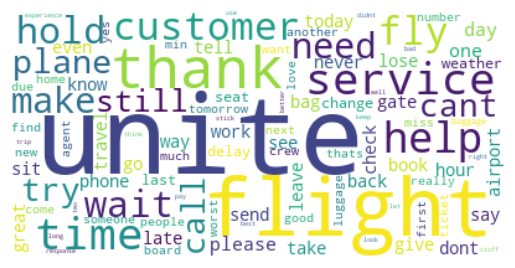

In [69]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)
cloud = WordCloud(stopwords=stopwords, # BACK UP
                      background_color="white",
                      collocations=False,
                      max_words=100).generate(text)

plt.imshow(cloud, interpolation='bilinear') # IM = IMAGE 
plt.axis("off") # NO AXIS
plt.show() # DISPLAY PLOT

# Sentiment Analysis 

In [71]:
data2 = data[['airline_sentiment','text']].copy()

target_map = {'positive':1,'negative': 0,'neutral': 2}
data2['Target'] = data2['airline_sentiment'].map(target_map)

data2.head()


,airline_sentiment,text,Target
0,neutral,say,2
1,positive,plus youve add experience tacky,1
2,neutral,didnt today must mean need take another trip,2
3,negative,really aggressive blast obnoxious entertainmen...,0
4,negative,really big bad thing,0


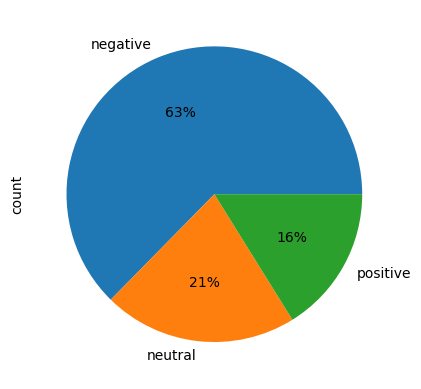

In [72]:
data.airline_sentiment.value_counts().plot.pie(autopct="%0.0f%%");

### As we can only 16 % Positive tweets over there and 63 % Negative 

# Machine Learning Model 

# Naive Bayes 

In [76]:
data2.head()

,airline_sentiment,text,Target
0,neutral,say,2
1,positive,plus youve add experience tacky,1
2,neutral,didnt today must mean need take another trip,2
3,negative,really aggressive blast obnoxious entertainmen...,0
4,negative,really big bad thing,0


In [77]:
X = data2['text']
y = data2['Target']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [78]:
vectorizer = CountVectorizer()

X_train = vectorizer.fit_transform(X_train)
X_test  = vectorizer.transform(X_test)

In [79]:
from sklearn.naive_bayes import BernoulliNB,MultinomialNB,GaussianNB

model = MultinomialNB(alpha=0)  # Laplace smoothing (alpha) = 0 
model.fit(X_train, y_train)

MultinomialNB(alpha=0)

In [80]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

Accuracy: 0.7278133577310155
              precision    recall  f1-score   support

           0       0.78      0.89      0.83      2793
           1       0.69      0.57      0.62       690
           2       0.50      0.35      0.41       889

    accuracy                           0.73      4372
   macro avg       0.66      0.60      0.62      4372
weighted avg       0.71      0.73      0.71      4372



### As we can see by using Naive Bayes we got 73% accuracy.

# Random Forest 

In [140]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(n_estimators=100, random_state=42)  # n_estimators is the number of trees

model2.fit(X_train, y_train)

y_pred = model2.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

Accuracy: 0.7561756633119854
              precision    recall  f1-score   support

           0       0.82      0.87      0.84      2793
           1       0.68      0.64      0.66       690
           2       0.57      0.51      0.54       889

    accuracy                           0.76      4372
   macro avg       0.69      0.67      0.68      4372
weighted avg       0.75      0.76      0.75      4372



### As we can see by using Random Forest we got 76 % accuracy

# We select Random Forest Algorithm as per there accuracy 

# Finish